In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
# Load and preprocess
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=column_names)
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Use only selected features from Step 3 (example set, adjust if needed)
selected_features = ['cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
X = df[selected_features]
y = df['target']

# Scale
X_scaled = StandardScaler().fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [3]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"\n{name} Evaluation:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))



Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.91      0.75      0.82        28

    accuracy                           0.85        60
   macro avg       0.86      0.84      0.85        60
weighted avg       0.86      0.85      0.85        60


Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.77      0.71      0.74        28

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.

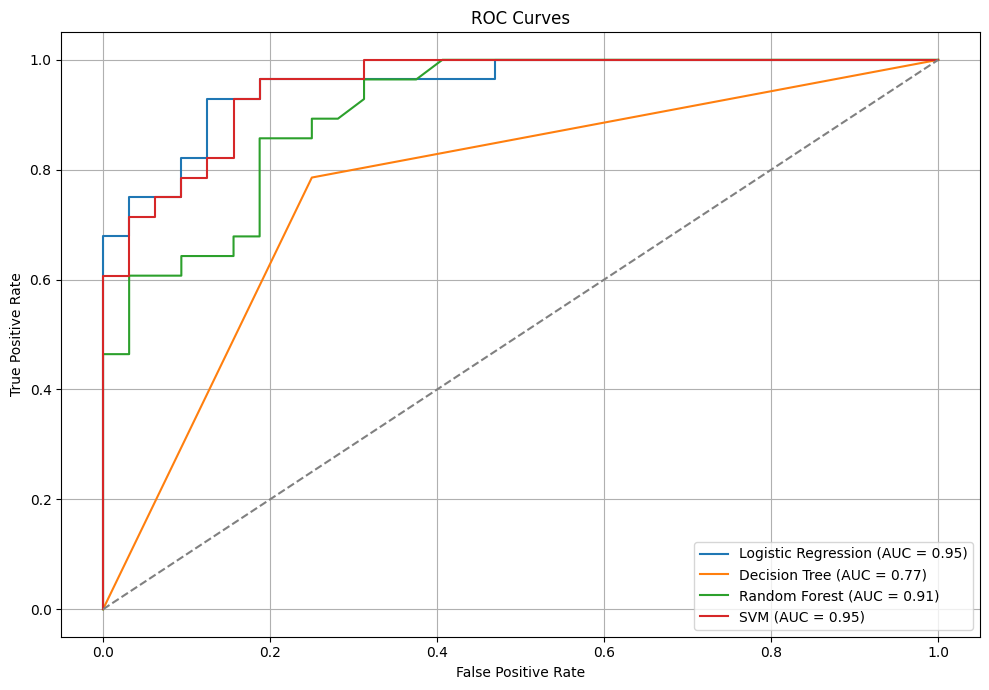

In [4]:
plt.figure(figsize=(10, 7))

for name, model in trained_models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
